# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Elizabeth Garsia

## What does a Simple Linear Regression Model do?

#### A Simple Linear Regression Model predicts the relationship between two variables by fitting a linear equation to observed data. Specifically, it aims to model the relationship between a dependent variable and one independant variable by estimating the coefficiants of the linear equation.This allows to make predicitions about the dependant variable based on new values of the independant variable.

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
data = sns.load_dataset('diamonds')

In [4]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)

- The Pearson correlation coefficient (r-value) measures the strength and direction of the linear relationship between two variables.
- Its possible range of values is from -1 to 1.
- An r-value close to 1 indicates a strong positive correlation, meaning that as one variable increases, the other variable also tends to increase.
- An r-value close to -1 indicates a strong negative correlation, meaning that as one variable increases, the other variable tends to decrease.
- An r-value close to 0 indicates no linear correlation between the variables.


In [6]:
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
correlation_matrix.head(7)



,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Text(0.5, 1.0, 'Correlation Heatmap for Price Column (Top Correlated)')

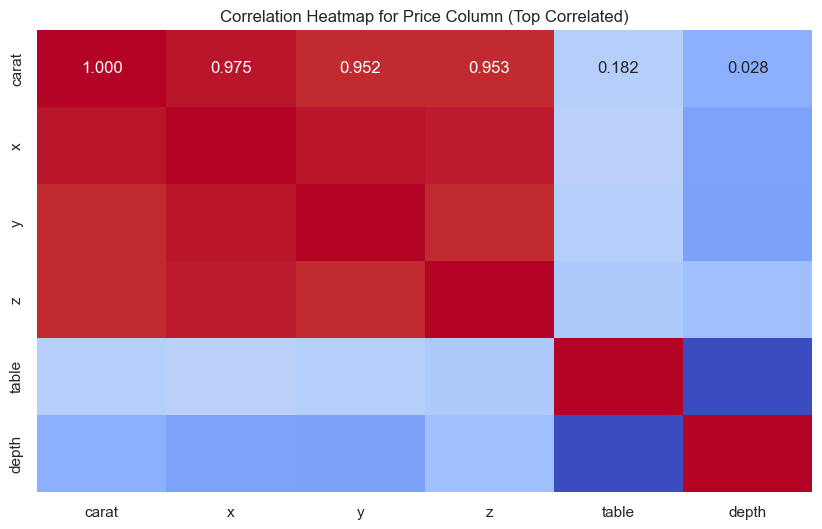

In [66]:
numeric_data = data.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()

price_correlation = correlation_matrix['price'].sort_values(ascending=False)

top_correlated_columns = price_correlation.index[1:]

top_correlation_matrix = correlation_matrix.loc[top_correlated_columns, top_correlated_columns]

sns.set(font_scale=1) 
heatmap = sns.heatmap(top_correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm', cbar=False)
heatmap.set_title('Correlation Heatmap for Price Column (Top Correlated)')



## Procedure for Creating and Using a Regression Model

1. Data Preparation:
   - Gather the relevant data needed for the regression analysis.
   - Preprocess the data by handling missing values, encoding categorical variables, and scaling numeric features if necessary.

2. Model Selection and Training:
   - Choose a suitable regression model based on the problem requirements and data characteristics.
   - Split the data into training and testing sets.
   - Train the regression model using the training data.

3. Model Evaluation:
   - Evaluate the performance of the trained model using appropriate evaluation metrics such as mean squared error, R-squared, or others.
   - Analyze the model's performance to identify any shortcomings or areas for improvement.

4. Model Deployment and Usage:
   - Deploy the trained regression model in a production environment if applicable.
   - Utilize the deployed model to make predictions on new or unseen data.


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [19]:
strongest_correlation_column = price_correlation.index[1]

X = data[[strongest_correlation_column]]  
y = data['price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)



In [21]:
model = LinearRegression()

print(model)


LinearRegression()


In [24]:
model.fit(X_train, y_train)

print(model)


LinearRegression()


In [27]:
score = model.score(X_test, y_test)

print(score)


0.8504107786474794


In [31]:
y_pred = model.predict(X_test)


print("array([[", y_pred, "]]")



array([[ [9540.64191438 1940.07543252 3180.98424589 ... 9618.19871522 -464.18539337
 5507.68827094] ]]


In [34]:
predicted_df = pd.DataFrame(y_pred, columns=['predicted_price'])

print(predicted_df.head(3))


   predicted_price
0      9540.641914
1      1940.075433
2      3180.984246


In [37]:
y_test_df = pd.DataFrame(y_test, columns=['price'])
predicted_df = pd.DataFrame(y_pred, columns=['predicted_price'])

joined_df = pd.concat([X_test.reset_index(drop=True), y_test_df, predicted_df], axis=1)

print(joined_df.head(5))


   carat  price  predicted_price
0   1.52    NaN      9540.641914
1   0.54  326.0      1940.075433
2   0.70    NaN      3180.984246
3   0.59    NaN      2327.859437
4   0.86    NaN      4421.893059


In [41]:
melted_df = pd.melt(joined_df, value_vars=['price', 'predicted_price'], var_name='pric_type', value_name='price_value')

print(melted_df)


             pric_type  price_value
0                price          NaN
1                price        326.0
2                price          NaN
3                price          NaN
4                price          NaN
...                ...          ...
54997  predicted_price          NaN
54998  predicted_price          NaN
54999  predicted_price          NaN
55000  predicted_price          NaN
55001  predicted_price          NaN

[55002 rows x 2 columns]


/var/folders/r_/jsr48d0111n_h7_hg__c4lqm0000gn/T/ipykernel_77837/2567525944.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=joined_df, x='carat', y='predicted_price', ci=None)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: module 'seaborn' has no attribute 'set_title'

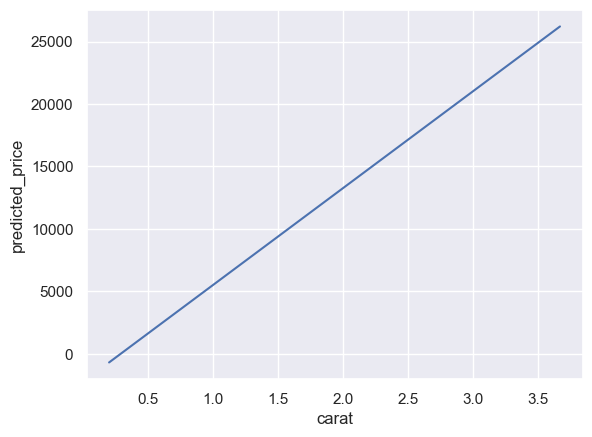

In [50]:
import seaborn as sns

sns.lineplot(data=joined_df, x='carat', y='predicted_price', ci=None)

sns.set_title('Predicted Price vs. Carat')
sns.set_xlabel('Carat')
sns.set_ylabel('Predicted Price')

sns.show()


## Regression Line Equation

The regression line equation is **y = mx + b**, where:

- **y** is the **dependent** variable 
- **m** is the **slope** of the line
- **x** is the **independent** variable
- **b** is the **Y-intercept**


In [56]:
X = data.carat.values.reshape(-1,1)
y = data.price


In [57]:
lr = LinearRegression()
predicted = lr.fit(X,y)


In [59]:
m = predicted.coef_
b = predicted.intercept_
print(f'Slope: {m} , y-intercept is {b}')


Slope: [7756.42561797] , y-intercept is -2256.360580045403


In [61]:
print(f'Regression line equation is: y = {m[0]} * x + {b}')


Regression line equation is: y = 7756.425617968435 * x + -2256.360580045403


In [64]:
carat = 0.70
predicted_price = m[0] * carat + b
print(f"The predicted price for a {carat} carat diamond is ${predicted_price:.2f}")


The predicted price for a 0.7 carat diamond is $3173.14


In [65]:
carat = 0.54
predicted_price = m[0] * carat + b
print(f"The predicted price for a {carat} carat diamond is ${predicted_price:.2f}")


The predicted price for a 0.54 carat diamond is $1932.11


#### The prices are lower than the predicted resluts in step 18. 